11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training No Regularization...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8724 - loss: 0.4555 - val_accuracy: 0.9612 - val_loss: 0.1262
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9718 - loss: 0.0955 - val_accuracy: 0.9740 - val_loss: 0.0854
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9841 - loss: 0.0514 - val_accuracy: 0.9718 - val_loss: 0.0891
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9764 - val_loss: 0.0776
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.9762 - val_loss: 0.0825
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9935 - loss: 0.0197 - val_accuracy: 0.9770 - val_loss: 0.0821
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9751 - val_loss: 0.0986
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.

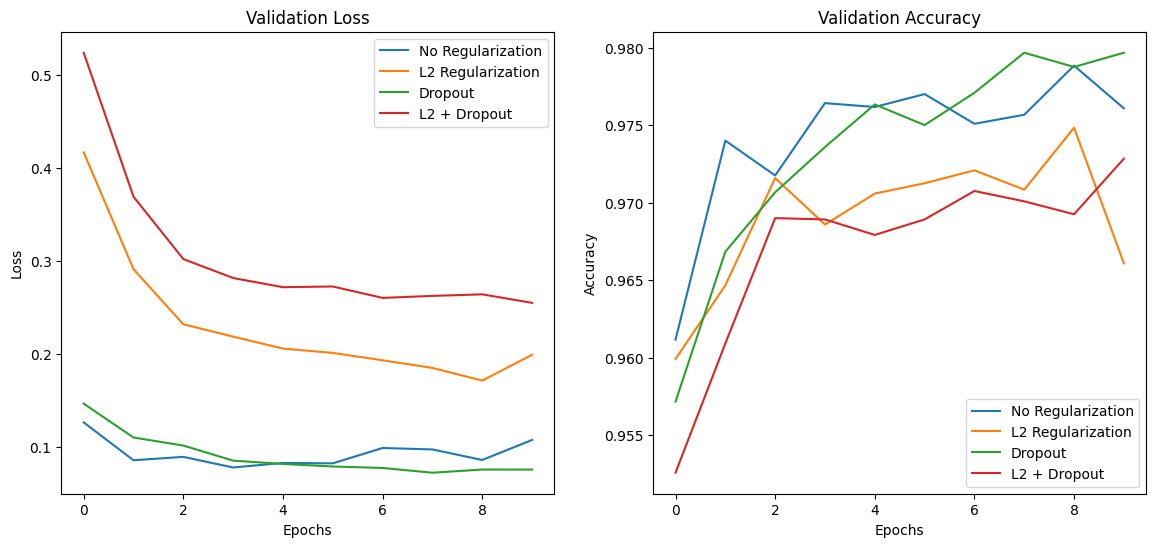

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

def build_model(use_l2=False, use_dropout=False):
    model = models.Sequential()
    if use_l2:
        reg = regularizers.l2(0.001)
    else:
        reg = None

    model.add(layers.Dense(512, activation='relu', kernel_regularizer=reg, input_shape=(784,)))
    if use_dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=reg))
    if use_dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

models_history = {}

configs = {
    "No Regularization": (False, False),
    "L2 Regularization": (True, False),
    "Dropout": (False, True),
    "L2 + Dropout": (True, True)
}

for name, (use_l2, use_dropout) in configs.items():
    print(f"\nTraining {name}...")
    model = build_model(use_l2, use_dropout)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_split=0.2, verbose=1)
    models_history[name] = history

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
for name, history in models_history.items():
    plt.plot(history.history['val_loss'], label=f"{name}")
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
for name, history in models_history.items():
    plt.plot(history.history['val_accuracy'], label=f"{name}")
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
